# Pet Emotion Detection 

**Problem Statement:**   
This project aims to build a model to know the emotion of a pet by their facial expression. Understanding the emotional states of pets is crucial for enhancing human-pet interactions and ensuring their well-being. Traditional methods for interpreting pet emotions have limitations, necessitating the application of machine learning and computer vision techniques to predict pet facial expressions accurately.

**Objective:**   
The main objective of this project is to develop a pet facial expression prediction system using neural networks (CNN). The system will be designed to classify pet facial images into different emotional states, such as happiness, sadness, fear, and others, providing valuable insights into pets' emotional well-being.

**Dataset:**  
For this project, I've selected a dataset from Kaggle "Pet's Facial Expression Image Dataset" by Ansh Tanwar [[[https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset](https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset)]]. 
While this dataset is new, we will take this as a reference and explore the project and see if we can make tweaks or improvements to it. the dataset has train, test and validation data that are classified into various pet's emotions.  


In [156]:
import numpy as np
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [157]:
# code to make tensors run on GPU
def set_gpu_device():
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.set_visible_devices(physical_devices[0], 'GPU')
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Calling the function to set GPU device
set_gpu_device()
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("No GPU found. TensorFlow will use the CPU.")

GPU is available!


In [158]:
# seting path to the dataset
train_data = pathlib.Path('pet/Data/train/')
test_data = pathlib.Path('pet/Data/test/')
valid_data = pathlib.Path('pet/Data/valid/')


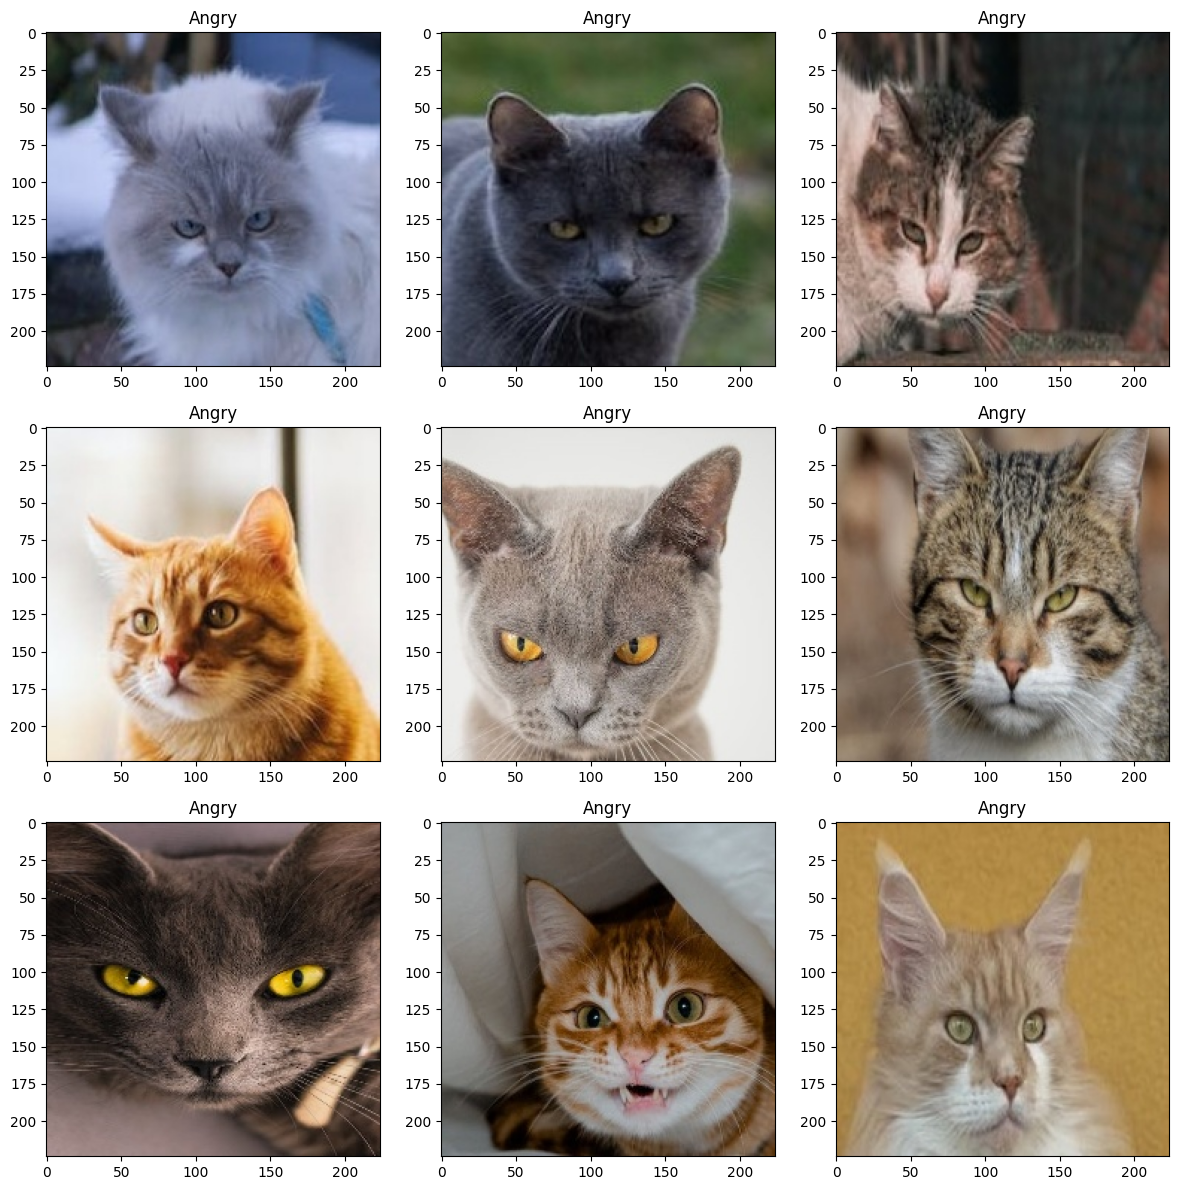

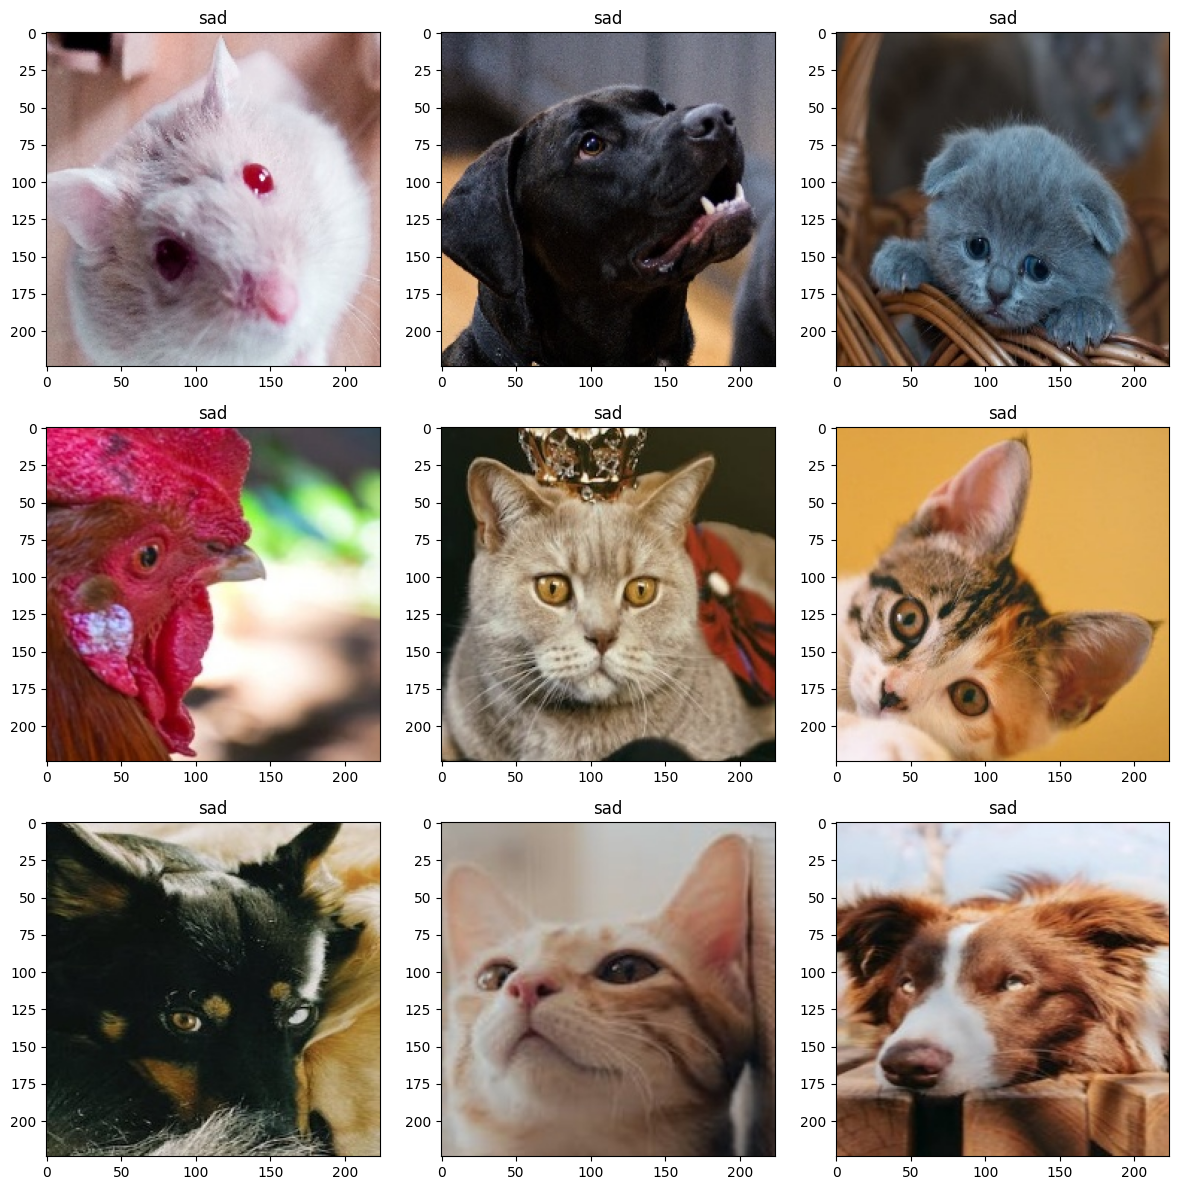

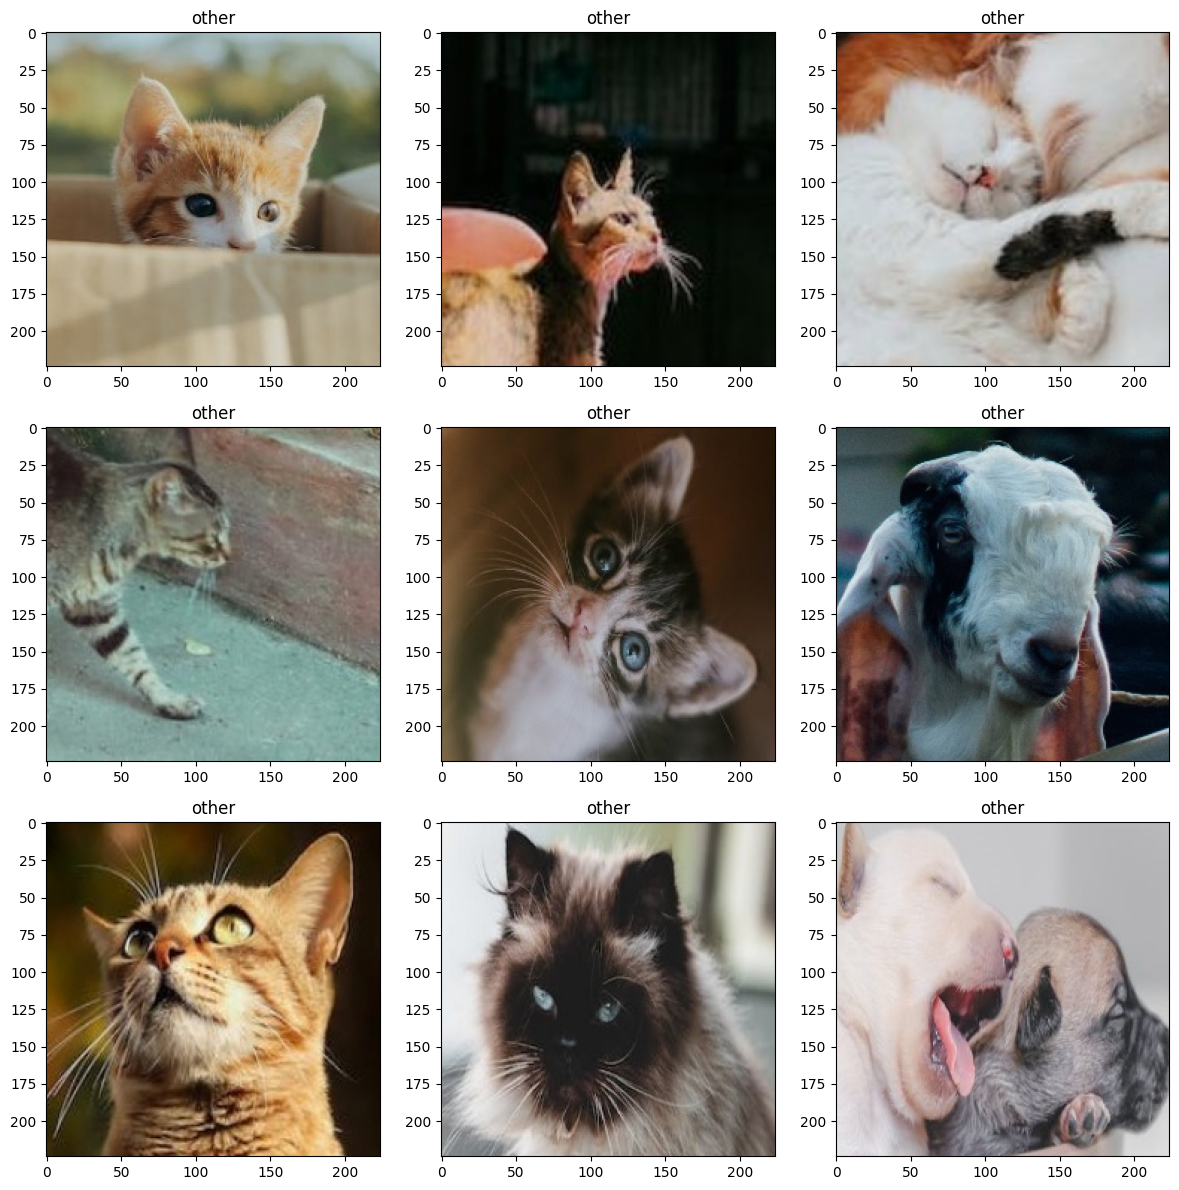

KeyboardInterrupt: 

In [159]:
from tensorflow.keras.preprocessing.image import load_img
path = "pet/Data/train/"
expression = ['Angry', 'sad', 'other', 'happy']
for exp in expression:
    plt.figure(figsize=(12, 12))
    for i in range(1, 10, 1):
        plt.subplot(3, 3, i)
        img = load_img(path + exp + "/" +
                       os.listdir(path + exp)[i], target_size=(224, 224))
        plt.imshow(img) 
        plt.title(exp)  
    plt.tight_layout()  
    plt.show()

Data Preprocessing:

- Data augmentation is done to increase the variation in our training data, which helps the model generalize better on unseen examples. 
- In our code we applied some random rotations, shifts, and flips, simulating real-world cases that might occour when capturing an image of a pet.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# batch size and target image size
batch_size = 32
# img_size = (224, 224) 
img_size = (128, 128) 

# It is used to generate augmented images for training  model.
train_datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip=True,
)

datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical' 
)

valid_generator = datagen.flow_from_directory(
    valid_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


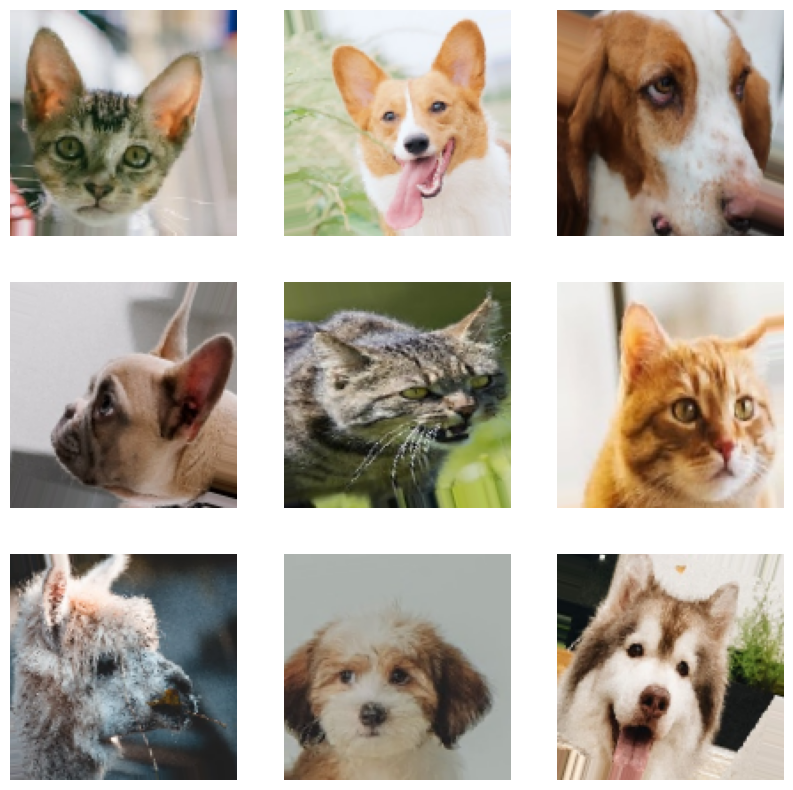

In [ ]:
# generating a batch of images from a `train_generator` and displaying them in a 3x3 grid.

images, _ = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.axis("off")
plt.show()

In [ ]:

# creaing a sequential model
model = Sequential()

# adding convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# model head
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(4, activation='softmax'))  # 4 represents the number of classes in our case the emotions


model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 14, 14, 128)    

In [ ]:
# setting training steps per epoch
# to ensure the enteri dataset is covered in in on epoch
# model trains on the entire training dataset and validates on the entire validation dataset while effectively utilizing available memory and computational resources.
# steps_per_epoch = train_generator.samples // batch_size
# validation_steps = valid_generator.samples // batch_size

# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="data/pet_models/fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
# model fitting/ training
history = model.fit(
    train_generator,
    # steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=valid_generator,
    # validation_steps=validation_steps,
    callbacks = callbacks
)

Epoch 1/20
32/32 [==============================] - 7s 171ms/step - loss: 32.5139 - accuracy: 0.2590 - val_loss: 1.3709 - val_accuracy: 0.3611
Epoch 2/20
32/32 [==============================] - 4s 118ms/step - loss: 1.3835 - accuracy: 0.2710 - val_loss: 1.3754 - val_accuracy: 0.3333
Epoch 3/20
32/32 [==============================] - 5s 165ms/step - loss: 1.3526 - accuracy: 0.2820 - val_loss: 1.3510 - val_accuracy: 0.3611
Epoch 4/20
32/32 [==============================] - 5s 143ms/step - loss: 1.3501 - accuracy: 0.3180 - val_loss: 1.3645 - val_accuracy: 0.3611
Epoch 5/20
32/32 [==============================] - 6s 179ms/step - loss: 1.3343 - accuracy: 0.3140 - val_loss: 1.3254 - val_accuracy: 0.3611
Epoch 6/20
32/32 [==============================] - 4s 128ms/step - loss: 1.3528 - accuracy: 0.3500 - val_loss: 1.3527 - val_accuracy: 0.3889
Epoch 7/20
32/32 [==============================] - 4s 124ms/step - loss: 1.3489 - accuracy: 0.2950 - val_loss: 1.3848 - val_accuracy: 0.2500
Epoch

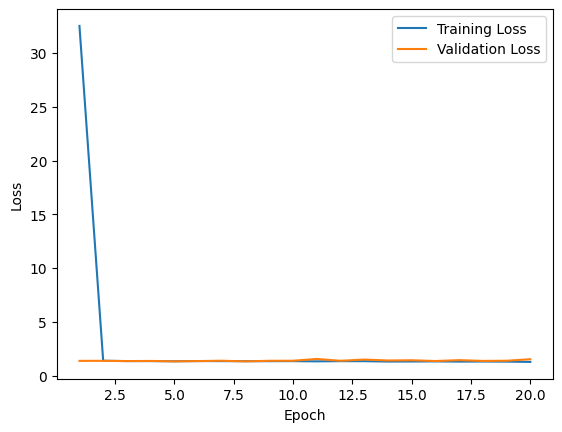

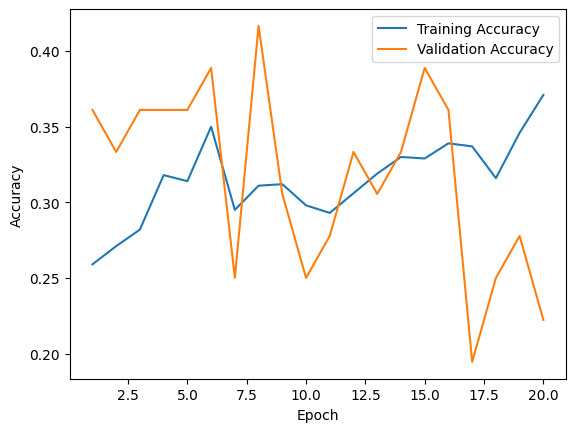

In [ ]:
# Accessing performance metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# evaluating the performance of the model on a test dataset.
test_loss, test_acc = model.evaluate(test_generator)
val_loss, val_acc = model.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")


2/2 [==============================] - 0s 4ms/step - loss: 1.5239 - accuracy: 0.2222
Test accuracy: 21.05%
Validation accuracy: 22.22%


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # getting class labels and indices
# class_labels = list(train_generator.class_indices.keys())
# class_indices = train_generator.class_indices

# # getting a batch of test data and corresponding labels
# test_images, test_labels = next(test_generator)

# # prediciton on test images
# predictions = model.predict(test_images)
# predicted_classes = np.argmax(predictions, axis=1)
# predicted_labels = [class_labels[idx] for idx in predicted_classes]

# # plotting the actual and predicted labels of the images
# num_images = len(test_images)
# plt.figure(figsize=(15, 10))
# for i in range(num_images):
#     plt.subplot(4, 8, i + 1)
#     plt.imshow(test_images[i])
#     plt.title(f"Actual: {class_labels[np.argmax(test_labels[i])]}\nPredicted: {predicted_labels[i]}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:
# # correctly classified 
# num_images = len(test_images)
# plt.figure(figsize=(15, 10))
# correctly_classified_indices = np.where(predicted_classes == np.argmax(test_labels, axis=1))[0]

# for i, idx in enumerate(correctly_classified_indices):
#     plt.subplot(4, 8, i + 1)
#     plt.imshow(test_images[idx])
#     plt.title(f"Actual: {class_labels[np.argmax(test_labels[idx])]}\nPredicted: {predicted_labels[idx]}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

In [ ]:

# # find misclassified indices
# misclassified_indices = [i for i in range(len(test_labels)) if np.argmax(test_labels[i]) != predicted_classes[i]]

# # plotting the misclassified images
# num_misclassified = len(misclassified_indices)
# plt.figure(figsize=(15, 10))
# for i, mis_idx in enumerate(misclassified_indices):
#     plt.subplot(4, 8, i + 1)
#     plt.imshow(test_images[mis_idx])
#     plt.title(f"Actual: {class_labels[np.argmax(test_labels[mis_idx])]}\nPredicted: {predicted_labels[mis_idx]}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

Experimenting more : 

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


def build_model(seed=36, input_shape=(128, 128, 3), num_classes=4):
    tf.random.set_seed(seed)
    
    model = Sequential()
    # Convolutional and pooling layers
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(2, 2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# def build_model(seed=23):
#     tf.random.set_seed(seed)
#     # Creating a deeper sequential model
#     model = Sequential()

#     # Adding convolutional and pooling layers
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)))
#     model.add(MaxPooling2D(2, 2))

#     model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(MaxPooling2D(2, 2))

#     model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(MaxPooling2D(2, 2))

#     model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(MaxPooling2D(2, 2))

#     model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(MaxPooling2D(2, 2))

#     # Model head
#     model.add(Flatten())
#     model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(4, activation='softmax'))
#     return model

def build_simple_model(seed=23):
    tf.random.set_seed(seed)
    # Creating a simpler sequential model
    model = Sequential()

    # Adding convolutional and pooling layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3)))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(2, 2))

    # Model head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))

    return model


In [ ]:
def build_and_train_model(optimizer, name):
    
    model = build_model()
    # model = build_simple_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="data/pet_models/"+name+".keras",
        save_best_only=True,
        monitor="val_loss")]

    return model.fit(train_generator,
                epochs=20,
                validation_data=valid_generator,
                callbacks = callbacks,
                verbose = 1
                )


# def build_and_train_model(optimizer, name):
    
#     steps_per_epoch = train_generator.samples // batch_size
#     validation_steps = valid_generator.samples // batch_size

#     model = build_model()
#     # model = build_simple_model()
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#     callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="data/pet_models/fine_tuning_"+name+".keras",
#         save_best_only=True,
#         monitor="val_loss")]

#     return model.fit(train_generator,
#                 steps_per_epoch=steps_per_epoch,
#                 epochs=20,
#                 validation_data=valid_generator,
#                 validation_steps=validation_steps,
#                 callbacks = callbacks)


In [ ]:
lr = 0.001

Epoch 1/20
32/32 [==============================] - 8s 196ms/step - loss: 358.3520 - accuracy: 0.2540 - val_loss: 51.5067 - val_accuracy: 0.2222
Epoch 2/20
32/32 [==============================] - 6s 176ms/step - loss: 52.8896 - accuracy: 0.2730 - val_loss: 50.4415 - val_accuracy: 0.3056
Epoch 3/20
32/32 [==============================] - 6s 186ms/step - loss: 51.3047 - accuracy: 0.2620 - val_loss: 50.3485 - val_accuracy: 0.1667
Epoch 4/20
32/32 [==============================] - 6s 181ms/step - loss: 50.6187 - accuracy: 0.2910 - val_loss: 50.0856 - val_accuracy: 0.2500
Epoch 5/20
32/32 [==============================] - 6s 174ms/step - loss: 50.4342 - accuracy: 0.2700 - val_loss: 49.9790 - val_accuracy: 0.2222
Epoch 6/20
32/32 [==============================] - 6s 181ms/step - loss: 50.2268 - accuracy: 0.2790 - val_loss: 49.8465 - val_accuracy: 0.2778
Epoch 7/20
32/32 [==============================] - 6s 183ms/step - loss: 49.9665 - accuracy: 0.2780 - val_loss: 49.7004 - val_accuracy

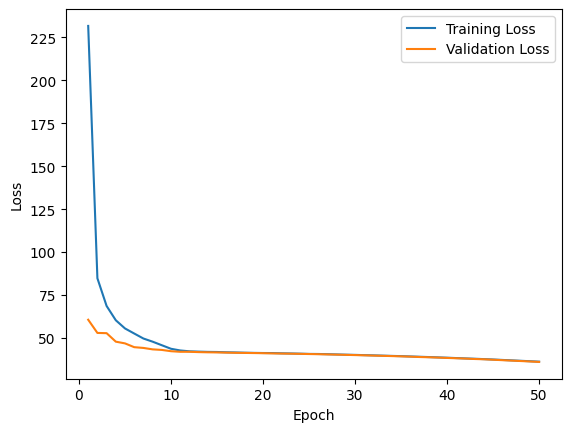

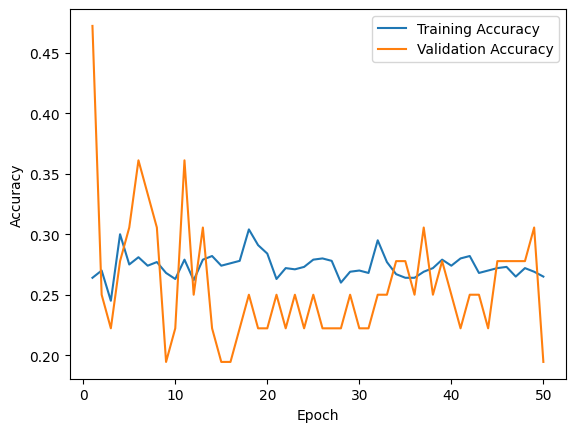

2/2 [==============================] - 0s 7ms/step - loss: 48.5563 - accuracy: 0.3056
Test accuracy: 31.58%
Validation accuracy: 30.56%


In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)

history_adagrad = build_and_train_model(optimizer, name = "adagrad")

# Accessing performance metrics from history
train_loss = history_adamax.history['loss']
val_loss = history_adamax.history['val_loss']
train_acc = history_adamax.history['accuracy']
val_acc = history_adamax.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
model_adamx = keras.models.load_model("data/pet_models/adagrad.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model_adamx.evaluate(test_generator)
val_loss, val_acc = model_adamx.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")


Epoch 1/20
32/32 [==============================] - 7s 200ms/step - loss: 1000.4576 - accuracy: 0.2560 - val_loss: 39.2072 - val_accuracy: 0.2778
Epoch 2/20
32/32 [==============================] - 4s 121ms/step - loss: 45.3329 - accuracy: 0.2730 - val_loss: 281.1938 - val_accuracy: 0.1667
Epoch 3/20
32/32 [==============================] - 6s 177ms/step - loss: 46.2986 - accuracy: 0.2690 - val_loss: 29.7008 - val_accuracy: 0.3056
Epoch 4/20
32/32 [==============================] - 4s 124ms/step - loss: 30.8383 - accuracy: 0.2600 - val_loss: 37.0610 - val_accuracy: 0.3056
Epoch 5/20
32/32 [==============================] - 6s 182ms/step - loss: 19.9634 - accuracy: 0.2540 - val_loss: 16.5363 - val_accuracy: 0.1667
Epoch 6/20
32/32 [==============================] - 6s 179ms/step - loss: 13.2346 - accuracy: 0.2330 - val_loss: 10.2787 - val_accuracy: 0.3056
Epoch 7/20
32/32 [==============================] - 6s 174ms/step - loss: 8.3188 - accuracy: 0.2460 - val_loss: 6.1704 - val_accuracy

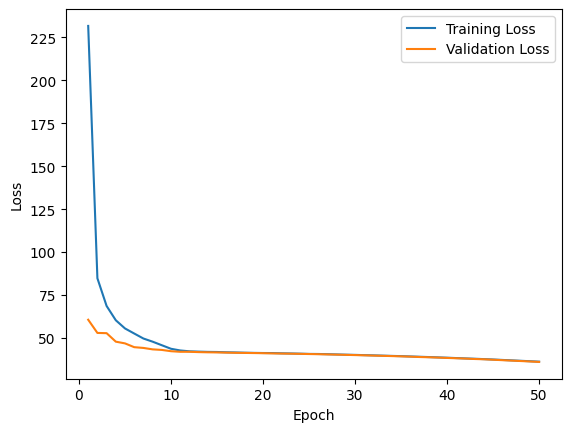

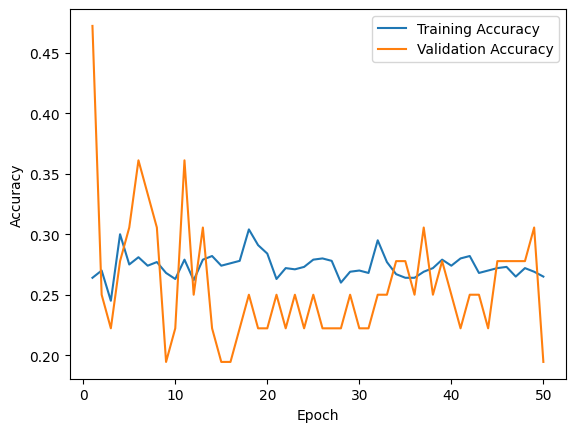

2/2 [==============================] - 0s 7ms/step - loss: 1.4363 - accuracy: 0.2500
Test accuracy: 26.32%
Validation accuracy: 25.00%


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9)

history_rmsprop = build_and_train_model(optimizer, name= "rmsprop")

# Accessing performance metrics from history
train_loss = history_adamax.history['loss']
val_loss = history_adamax.history['val_loss']
train_acc = history_adamax.history['accuracy']
val_acc = history_adamax.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_adamx = keras.models.load_model("data/pet_models/rmsprop.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model_adamx.evaluate(test_generator)
val_loss, val_acc = model_adamx.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")

Epoch 1/20
32/32 [==============================] - 7s 211ms/step - loss: 321.4827 - accuracy: 0.2780 - val_loss: 43.2591 - val_accuracy: 0.2500
Epoch 2/20
32/32 [==============================] - 7s 219ms/step - loss: 42.2792 - accuracy: 0.2990 - val_loss: 41.2372 - val_accuracy: 0.2778
Epoch 3/20
32/32 [==============================] - 6s 201ms/step - loss: 40.4180 - accuracy: 0.2950 - val_loss: 39.5952 - val_accuracy: 0.2778
Epoch 4/20
32/32 [==============================] - 8s 243ms/step - loss: 38.8678 - accuracy: 0.2910 - val_loss: 38.1628 - val_accuracy: 0.2500
Epoch 5/20
32/32 [==============================] - 9s 279ms/step - loss: 37.5620 - accuracy: 0.2870 - val_loss: 37.0290 - val_accuracy: 0.3889
Epoch 6/20
32/32 [==============================] - 7s 211ms/step - loss: 36.3939 - accuracy: 0.3060 - val_loss: 35.8577 - val_accuracy: 0.2500
Epoch 7/20
32/32 [==============================] - 8s 256ms/step - loss: 35.3475 - accuracy: 0.2860 - val_loss: 34.8000 - val_accuracy

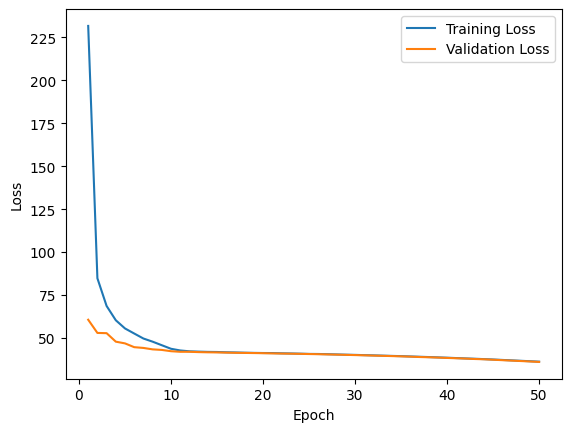

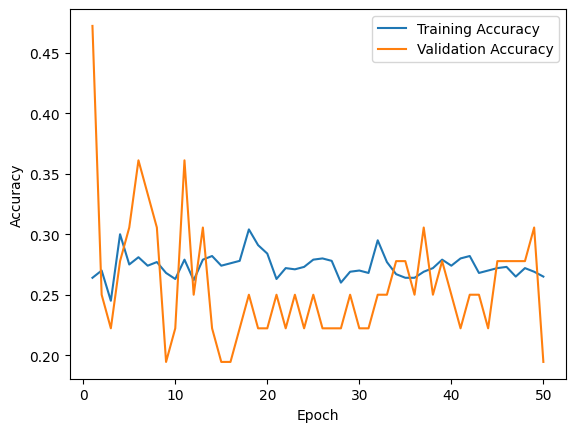

2/2 [==============================] - 0s 8ms/step - loss: 26.2289 - accuracy: 0.3333
Test accuracy: 21.05%
Validation accuracy: 33.33%


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9,
                                     beta_2=0.999)

history_adam = build_and_train_model(optimizer, name = "adam")
# Accessing performance metrics from history
train_loss = history_adamax.history['loss']
val_loss = history_adamax.history['val_loss']
train_acc = history_adamax.history['accuracy']
val_acc = history_adamax.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_adamx = keras.models.load_model("data/pet_models/adam.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model_adamx.evaluate(test_generator)
val_loss, val_acc = model_adamx.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")

Epoch 1/20
32/32 [==============================] - 11s 321ms/step - loss: 294.7307 - accuracy: 0.2610 - val_loss: 40.4801 - val_accuracy: 0.2222
Epoch 2/20
32/32 [==============================] - 7s 207ms/step - loss: 40.1217 - accuracy: 0.2460 - val_loss: 39.6701 - val_accuracy: 0.1944
Epoch 3/20
32/32 [==============================] - 8s 241ms/step - loss: 39.4565 - accuracy: 0.2820 - val_loss: 39.1459 - val_accuracy: 0.3056
Epoch 4/20
32/32 [==============================] - 7s 232ms/step - loss: 38.9548 - accuracy: 0.2860 - val_loss: 38.7743 - val_accuracy: 0.2500
Epoch 5/20
32/32 [==============================] - 7s 232ms/step - loss: 38.5442 - accuracy: 0.2940 - val_loss: 38.3873 - val_accuracy: 0.2778
Epoch 6/20
32/32 [==============================] - 8s 241ms/step - loss: 38.1638 - accuracy: 0.3390 - val_loss: 38.0907 - val_accuracy: 0.3056
Epoch 7/20
32/32 [==============================] - 7s 210ms/step - loss: 37.8798 - accuracy: 0.3450 - val_loss: 37.7890 - val_accurac

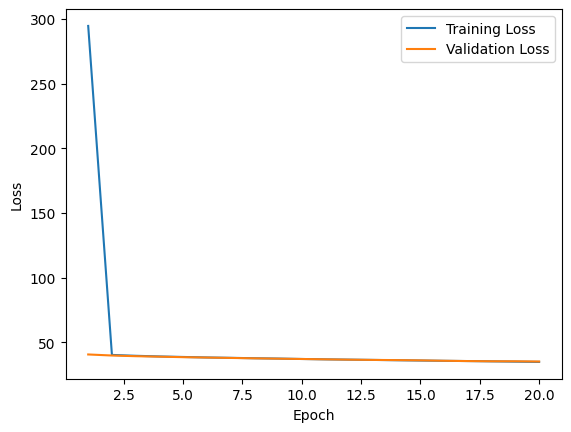

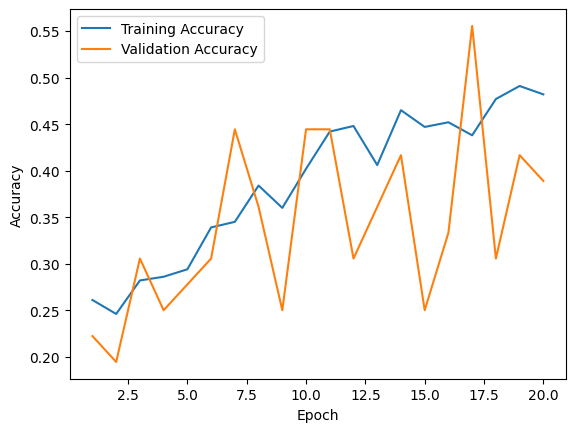

2/2 [==============================] - 0s 9ms/step - loss: 35.0268 - accuracy: 0.3889
Test accuracy: 31.58%
Validation accuracy: 38.89%


In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=lr, beta_1=0.9,
                                       beta_2=0.999)
history_adamax = build_and_train_model(optimizer, name="adammax")

# Accessing performance metrics from history
train_loss = history_adamax.history['loss']
val_loss = history_adamax.history['val_loss']
train_acc = history_adamax.history['accuracy']
val_acc = history_adamax.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_adamx = keras.models.load_model("data/pet_models/adammax.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model_adamx.evaluate(test_generator)
val_loss, val_acc = model_adamx.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")


Epoch 1/20
32/32 [==============================] - 8s 223ms/step - loss: 366.9960 - accuracy: 0.2370 - val_loss: 42.1459 - val_accuracy: 0.2222
Epoch 2/20
32/32 [==============================] - 10s 314ms/step - loss: 41.4136 - accuracy: 0.2660 - val_loss: 40.4723 - val_accuracy: 0.2778
Epoch 3/20
32/32 [==============================] - 7s 222ms/step - loss: 39.6544 - accuracy: 0.2550 - val_loss: 38.8621 - val_accuracy: 0.2222
Epoch 4/20
32/32 [==============================] - 6s 198ms/step - loss: 38.1607 - accuracy: 0.2520 - val_loss: 37.4573 - val_accuracy: 0.2778
Epoch 5/20
32/32 [==============================] - 7s 218ms/step - loss: 36.8656 - accuracy: 0.2970 - val_loss: 36.2581 - val_accuracy: 0.2500
Epoch 6/20
32/32 [==============================] - 8s 240ms/step - loss: 35.9834 - accuracy: 0.3170 - val_loss: 35.1023 - val_accuracy: 0.3889
Epoch 7/20
32/32 [==============================] - 7s 229ms/step - loss: 35.8236 - accuracy: 0.3030 - val_loss: 34.4442 - val_accurac

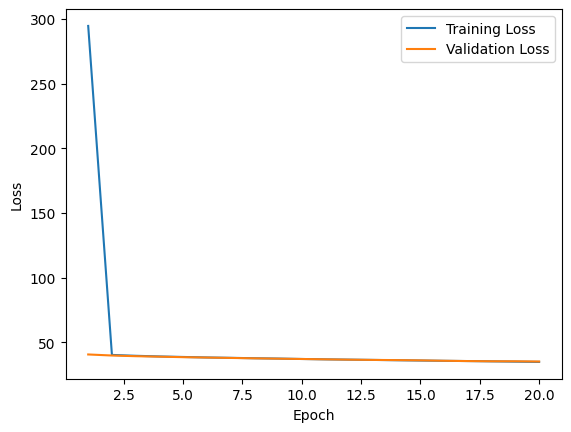

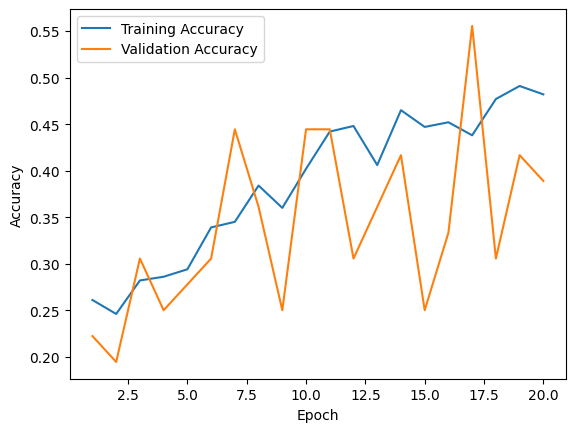

2/2 [==============================] - 0s 11ms/step - loss: 27.9069 - accuracy: 0.3611
Test accuracy: 31.58%
Validation accuracy: 36.11%


In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr, beta_1=0.9,
                                      beta_2=0.999)

history_nadam = build_and_train_model(optimizer, name ="nadam")

# Accessing performance metrics from history
train_loss = history_adamax.history['loss']
val_loss = history_adamax.history['val_loss']
train_acc = history_adamax.history['accuracy']
val_acc = history_adamax.history['val_accuracy']

# Assuming you have the same number of epochs as in your training
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_adamx = keras.models.load_model("data/pet_models/nadam.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model_adamx.evaluate(test_generator)
val_loss, val_acc = model_adamx.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")

Utilizing the Adam Max optimizer for our model: 

In [ ]:
tf.random.set_seed(36)

model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2, 2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
# Output layer
model.add(Dense(4, activation='softmax'))


# model = build_simple_model()
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath="data/pet_models/final.keras",
    save_best_only=True,
    monitor="val_loss")]

history = model.fit(train_generator,epochs=10,
          validation_data=valid_generator,
          callbacks = callbacks,verbose = 1)



Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_46/conv2d_174/Relu' defined at (most recent call last):
    File "E:\PROGRAMS_SOFTWARES\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "E:\PROGRAMS_SOFTWARES\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\sudha\py10\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\sudha\py10\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "E:\PROGRAMS_SOFTWARES\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "E:\PROGRAMS_SOFTWARES\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "E:\PROGRAMS_SOFTWARES\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\sudha\py10\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\sudha\py10\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sudha\AppData\Local\Temp\ipykernel_7680\1736458479.py", line 38, in <module>
      model.fit(train_generator,epochs=10,
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\sudha\py10\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\sudha\py10\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_46/conv2d_174/Relu'
OOM when allocating tensor with shape[32,64,126,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_46/conv2d_174/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_540969]

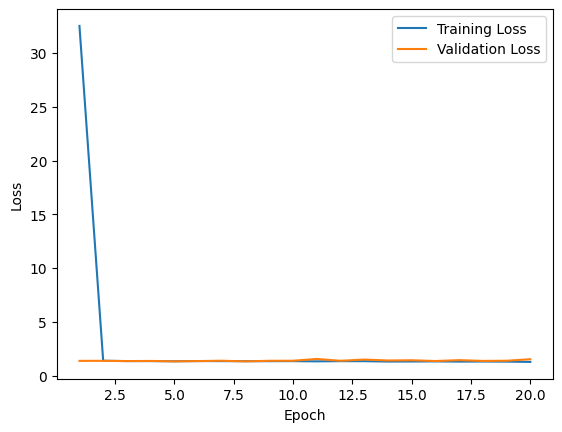

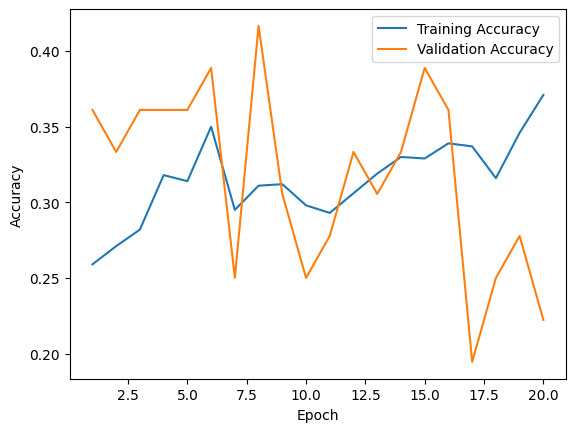

2/2 [==============================] - 0s 27ms/step - loss: 37.7921 - accuracy: 0.3056
Test accuracy: 36.84%
Validation accuracy: 30.56%


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

model_adamx = keras.models.load_model("data/pet_models/final.keras")

# Evaluate the model on the test and validation datasets
test_loss, test_acc = model.evaluate(test_generator)
val_loss, val_acc = model.evaluate(valid_generator)
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")